In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split,KFold,RepeatedKFold,StratifiedKFold,cross_val_score

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.feature_selection import RFECV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error

In [81]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, FunctionTransformer

In [5]:
pd.options.display.max_columns = None

In [36]:
df1 = pd.read_csv("train.csv")
df2 = pd.read_csv("test.csv")

df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [37]:
df_num = df1.select_dtypes(np.number)
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [11]:
df_num.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [38]:
df_cat = df1.select_dtypes(np.object)
df_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [20]:
df_num.isnull().sum()[df_num.isnull().sum() > 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

2.163569142324884


<AxesSubplot:>

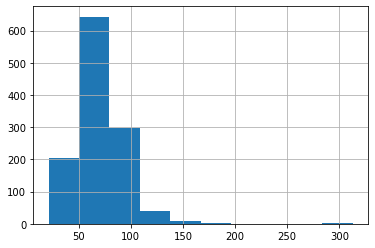

In [22]:
print(df1['LotFrontage'].skew())
df1['LotFrontage'].hist()

In [39]:
df1['LotFrontage'].fillna(0,inplace=True)

2.669084210182863


<AxesSubplot:>

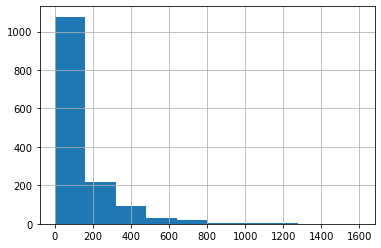

In [24]:
print(df1['MasVnrArea'].skew())
df1['MasVnrArea'].hist()

In [40]:
df1['MasVnrArea'].fillna(0,inplace=True)

In [41]:
df1['GarageYrBlt'].fillna(0,inplace=True)

In [27]:
df_num = df1.select_dtypes(np.number)

In [28]:
df_cat.isnull().sum()[df_cat.isnull().sum() > 0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [61]:
for col in df_cat.columns:
    df1[col].fillna('None',inplace=True)

In [62]:
df_cat.isnull().sum()[df_cat.isnull().sum() > 0]

Series([], dtype: int64)

### NULLS REMOVED.

### OUTLIERS:

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38]),
 [Text(1, 0, 'Id'),
  Text(2, 0, 'MSSubClass'),
  Text(3, 0, 'LotFrontage'),
  Text(4, 0, 'LotArea'),
  Text(5, 0, 'OverallQual'),
  Text(6, 0, 'OverallCond'),
  Text(7, 0, 'YearBuilt'),
  Text(8, 0, 'YearRemodAdd'),
  Text(9, 0, 'MasVnrArea'),
  Text(10, 0, 'BsmtFinSF1'),
  Text(11, 0, 'BsmtFinSF2'),
  Text(12, 0, 'BsmtUnfSF'),
  Text(13, 0, 'TotalBsmtSF'),
  Text(14, 0, '1stFlrSF'),
  Text(15, 0, '2ndFlrSF'),
  Text(16, 0, 'LowQualFinSF'),
  Text(17, 0, 'GrLivArea'),
  Text(18, 0, 'BsmtFullBath'),
  Text(19, 0, 'BsmtHalfBath'),
  Text(20, 0, 'FullBath'),
  Text(21, 0, 'HalfBath'),
  Text(22, 0, 'BedroomAbvGr'),
  Text(23, 0, 'KitchenAbvGr'),
  Text(24, 0, 'TotRmsAbvGrd'),
  Text(25, 0, 'Fireplaces'),
  Text(26, 0, 'GarageYrBlt'),
  Text(27, 0, 'GarageCars'),
  Text(28, 0, 'GarageArea'),
  Text(29, 0, 'WoodDec

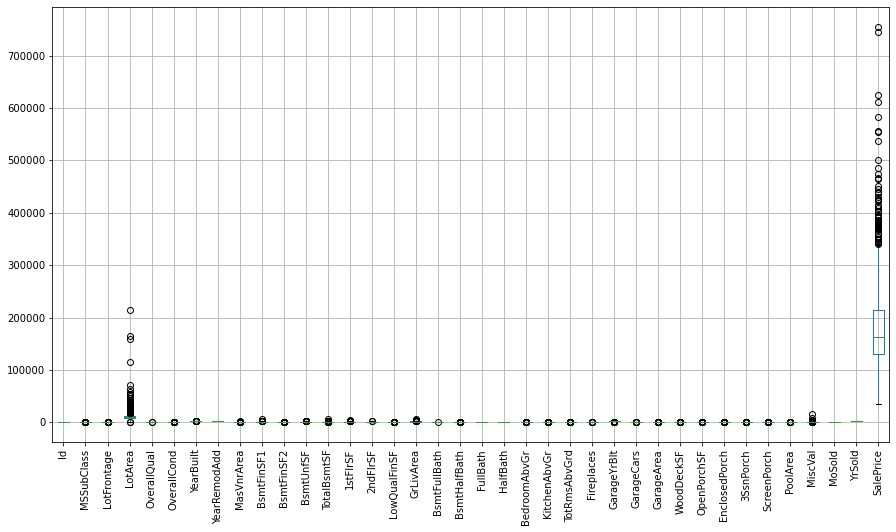

In [44]:
plt.figure(figsize= (15,8))
df1.boxplot()
plt.xticks(rotation=90)

In [45]:
df1_out = df1.copy()

q1 = df1.quantile(0.25)

q3 = df1.quantile(0.75)

iqr = q3-q1

upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)

df1_out = df1[((df1 > upper) | (df1 < lower)).any(axis=1)]

print("No of rows in outliers: ",df1_out.shape[0])

No of rows in outliers:  911


from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
col = df1.select_dtypes(np.number).columns
df3[col] = rs.fit_transform(df3[col])

In [58]:
df_num.skew()[df_num.skew()>1]

MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
TotalBsmtSF       1.524255
1stFlrSF          1.376757
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtHalfBath      4.103403
KitchenAbvGr      4.488397
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
SalePrice         1.882876
dtype: float64

In [59]:
df_num.skew()[df_num.skew()<1]

Id              0.000000
OverallQual     0.216944
OverallCond     0.693067
YearBuilt      -0.613461
YearRemodAdd   -0.503562
BsmtUnfSF       0.920268
2ndFlrSF        0.813030
BsmtFullBath    0.596067
FullBath        0.036562
HalfBath        0.675897
BedroomAbvGr    0.211790
TotRmsAbvGrd    0.676341
Fireplaces      0.649565
GarageYrBlt    -0.649415
GarageCars     -0.342549
GarageArea      0.179981
MoSold          0.212053
YrSold          0.096269
dtype: float64

In [ ]:
### Using Pipeline to pre-process data: 1. transformation

In [63]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [64]:
y = df1['SalePrice']
X = df1.iloc[:,1:]
X.drop('SalePrice',axis=1,inplace=True)


In [146]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.3)

In [147]:
ytrain = np.log1p(ytrain)
ytest = np.log1p(ytest)

In [148]:
cat_col = [col for col in xtrain.select_dtypes(np.object).columns if (xtrain[col].nunique() <15)]

num_col = [col for col in xtrain.select_dtypes(np.number).columns]



In [149]:
xtrain = xtrain[cat_col + num_col]

In [150]:
skewed_cols = xtrain.skew()[xtrain.skew() > 0.75].index

In [151]:
skewed_cols = skewed_cols.to_list()

In [152]:
from sklearn import set_config

In [153]:
set_config(display = 'diagram')

In [154]:
cat_transf = Pipeline(steps = [('encoder',OneHotEncoder(handle_unknown= 'ignore'))])

display(cat_transf)

Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

In [155]:
num_transf = Pipeline(steps = [('Col_transf',
                                ColumnTransformer(
                                            transformers=[
                                                      ('Log_Transf:np.log1p',FunctionTransformer(func = np.log1p),skewed_cols)]
                                                   ,remainder= 'passthrough')),
                              ('KNNImputer', KNNImputer(n_neighbors=2, add_indicator=False))])

display(num_transf)

Pipeline(steps=[('Col_transf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Log_Transf:np.log1p',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['MSSubClass', 'LotArea',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'BsmtHalfBath',
                                                   'KitchenAbvGr', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', '3SsnPorch',
                                                   'ScreenPorch', 'PoolArea',
                                                   'MiscVal'])])),
                ('KNNImputer', KNNImputer(n_neighbors=2))])

In [156]:
pp = ColumnTransformer(transformers=[('Col_transf_log',num_transf,num_col),('Categ_transf',cat_transf,cat_col)])
display(pp)
                      
                      
                    

ColumnTransformer(transformers=[('Col_transf_log',
                                 Pipeline(steps=[('Col_transf',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('Log_Transf:np.log1p',
                                                                                   FunctionTransformer(func=<ufunc 'log1p'>),
                                                                                   ['MSSubClass',
                                                                                    'LotArea',
                                                                                    'MasVnrArea',
                                                                                    'BsmtFinSF1',
                                                                                    'BsmtFinSF2',
                                                                                    'BsmtUnfSF',
                                                                                    'TotalBsmtSF',
                                                                                    '1stFlrSF',
                                                                                    '2ndFlrSF',
                                                                                    'LowQualFinSF',
                                                                                    'GrLivArea',
                                                                                    'BsmtHalfBat...
                                 ['MSZoning', 'Street', 'Alley', 'LotShape',
                                  'LandContour', 'Utilities', 'LotConfig',
                                  'LandSlope', 'Condition1', 'Condition2',
                                  'BldgType', 'HouseStyle', 'RoofStyle',
                                  'RoofMatl', 'MasVnrType', 'ExterQual',
                                  'ExterCond', 'Foundation', 'BsmtQual',
                                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Heating', 'HeatingQC',
                                  'CentralAir', 'Electrical', 'KitchenQual',
                                  'Functional', 'FireplaceQu', ...])])

In [157]:
def get_rmse(pipe,x,y):
    
    score = cross_val_score(pipe,x,y,scoring = 'neg_mean_squared_error',cv =3)
    rmse = np.sqrt(-(np.mean(score)))
    return rmse
    
    

In [158]:
pipe = Pipeline(steps = [('pre-process',pp),('model',Ridge())])

rmse1 = get_rmse(pipe,xtrain,ytrain)

print("Train RMSE: ",rmse1)
                
                   
rmse2 = get_rmse(pipe,xtest,ytest)
print("Test RMSE: ",rmse2)


Train RMSE:  0.15086839400644064
Test RMSE:  0.14474248518834937


In [162]:
results = pd.DataFrame({},columns =['Model','Train_RMSE','Test_RMSE'])
results= results.append({'Model': 'Ridge','Train_RMSE':rmse1,'Test_RMSE':rmse2},ignore_index=True)
results  

,Model,Train_RMSE,Test_RMSE
0,Ridge,0.268519,0.268495


In [163]:
pipe = Pipeline(steps = [('pre-process',pp),('model',Lasso())])

rmse1 = get_rmse(pipe,xtrain,ytrain)

print("Train RMSE: ",rmse1)
                
                   
rmse2 = get_rmse(pipe,xtest,ytest)
print("Test RMSE: ",rmse2)
results= results.append({'Model': 'Lasso','Train_RMSE':rmse1,'Test_RMSE':rmse2},ignore_index=True)
results  


Train RMSE:  0.2685194719025143
Test RMSE:  0.2684945476145079


,Model,Train_RMSE,Test_RMSE
0,Ridge,0.268519,0.268495
1,Lasso,0.268519,0.268495


In [164]:
pipe = Pipeline(steps = [('pre-process',pp),('model',LinearRegression())])

rmse1 = get_rmse(pipe,xtrain,ytrain)

print("Train RMSE: ",rmse1)
                
                   
rmse2 = get_rmse(pipe,xtest,ytest)
print("Test RMSE: ",rmse2)
results= results.append({'Model': 'LinearRegression','Train_RMSE':rmse1,'Test_RMSE':rmse2},ignore_index=True)
results  


Train RMSE:  0.16866257081134628
Test RMSE:  0.21448043143434467


,Model,Train_RMSE,Test_RMSE
0,Ridge,0.268519,0.268495
1,Lasso,0.268519,0.268495
2,LinearRegression,0.168663,0.214480


In [165]:
pipe = Pipeline(steps = [('pre-process',pp),('model',DecisionTreeRegressor())])

rmse1 = get_rmse(pipe,xtrain,ytrain)

print("Train RMSE: ",rmse1)
                
                   
rmse2 = get_rmse(pipe,xtest,ytest)
print("Test RMSE: ",rmse2)
results= results.append({'Model': 'DTReg','Train_RMSE':rmse1,'Test_RMSE':rmse2},ignore_index=True)
results  


Train RMSE:  0.22335185168711827
Test RMSE:  0.22434396032695225


,Model,Train_RMSE,Test_RMSE
0,Ridge,0.268519,0.268495
1,Lasso,0.268519,0.268495
2,LinearRegression,0.168663,0.214480
3,DTReg,0.223352,0.224344


In [166]:
pipe = Pipeline(steps = [('pre-process',pp),('model',RandomForestRegressor())])

rmse1 = get_rmse(pipe,xtrain,ytrain)

print("Train RMSE: ",rmse1)
                
                   
rmse2 = get_rmse(pipe,xtest,ytest)
print("Test RMSE: ",rmse2)
results= results.append({'Model': 'RF-reg','Train_RMSE':rmse1,'Test_RMSE':rmse2},ignore_index=True)
results  


Train RMSE:  0.15510806599472243
Test RMSE:  0.16141236697034467


,Model,Train_RMSE,Test_RMSE
0,Ridge,0.268519,0.268495
1,Lasso,0.268519,0.268495
2,LinearRegression,0.168663,0.214480
3,DTReg,0.223352,0.224344
4,RF-reg,0.155108,0.161412


In [167]:
pipe = Pipeline(steps = [('pre-process',pp),('model',GradientBoostingRegressor())])

rmse1 = get_rmse(pipe,xtrain,ytrain)

print("Train RMSE: ",rmse1)
                
                   
rmse2 = get_rmse(pipe,xtest,ytest)
print("Test RMSE: ",rmse2)
results= results.append({'Model': 'GB-reg','Train_RMSE':rmse1,'Test_RMSE':rmse2},ignore_index=True)
results 

Train RMSE:  0.14423685075411397
Test RMSE:  0.1464902932424662


,Model,Train_RMSE,Test_RMSE
0,Ridge,0.268519,0.268495
1,Lasso,0.268519,0.268495
2,LinearRegression,0.168663,0.214480
3,DTReg,0.223352,0.224344
4,RF-reg,0.155108,0.161412
5,GB-reg,0.144237,0.146490


In [168]:
pipe = Pipeline(steps = [('pre-process',pp),('model',AdaBoostRegressor())])

rmse1 = get_rmse(pipe,xtrain,ytrain)

print("Train RMSE: ",rmse1)
                
                   
rmse2 = get_rmse(pipe,xtest,ytest)
print("Test RMSE: ",rmse2)
results= results.append({'Model': 'AdaBoost-reg','Train_RMSE':rmse1,'Test_RMSE':rmse2},ignore_index=True)
results 

Train RMSE:  0.1782256420872191
Test RMSE:  0.17829079442531892


,Model,Train_RMSE,Test_RMSE
0,Ridge,0.268519,0.268495
1,Lasso,0.268519,0.268495
2,LinearRegression,0.168663,0.214480
3,DTReg,0.223352,0.224344
4,RF-reg,0.155108,0.161412
5,GB-reg,0.144237,0.146490
6,AdaBoost-reg,0.178226,0.178291


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Ridge'),
  Text(1, 0, 'Lasso'),
  Text(2, 0, 'LinearRegression'),
  Text(3, 0, 'DTReg'),
  Text(4, 0, 'RF-reg'),
  Text(5, 0, 'GB-reg'),
  Text(6, 0, 'AdaBoost-reg')])

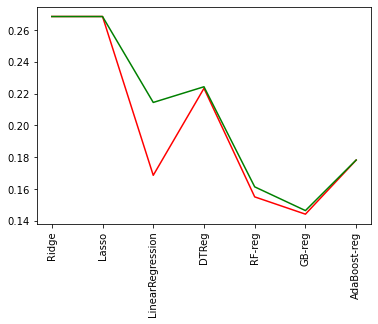

In [179]:
plt.plot(results['Train_RMSE'],'r-')
plt.xticks([0,1,2,3,4,5,6],labels = results['Model'])
plt.plot(results['Test_RMSE'],'g-')
plt.xticks(rotation = 90)

### Hypertuning:

In [ ]:
### RIDGE:

params = []

In [ ]:
def hyperopt_search(fn, space):
    trials = Trials()

    best_hyperparams=fmin(
        fn=fn, # function to optimize
        space=space, 
        algo=tpe.suggest, # optimization algorithm, hyperotp will select its parameters automatically
        max_evals=100, # maximum number of iterations
        trials=trials, # logging
        rstate=np.random.RandomState(123) # fixing random state for the reproducibility
    )

    print("The best hyperparameters are : ","\n")
    print(best_hyperparams)

    
    
    
    
    
    
    
def ridge_rmse_cv(params, preprocessor=preprocessor, X_train=X_train, y_train=y_train, random_state=123):
    
    # the function gets a set of variable parameters in "params"
    params = {'alpha': params['alpha']}
    
    # we use this params to create a new pipeline
    model = Ridge(**params)    
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # and then conduct the cross validation
    return rmse_cv(pipe, X_train, y_train)


space={'alpha': hp.loguniform('alpha', -10, 4)}

hyperopt_search(ridge_rmse_cv, space)

In [ ]:
### Tuning RF regressor:

rf = RandomForestRegressor(n_estimators= 100)